Bilgisayar Projesi 1 - IDS

ALL
Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
col_names = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label",
    "difficulty_level",
]

# Read in the data with the defined column names
df_train = pd.read_csv("KDDTrain+.txt", header=None, names=col_names)
df_test = pd.read_csv("KDDTest+.txt", header=None, names=col_names)

# Print the dimensions of the datasets
print("Train set:", df_train.shape)
print("Test set:", df_test.shape)

Train set: (125973, 43)
Test set: (22544, 43)


In [3]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_level'],
      dtype='object')

In [4]:
df_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_level'],
      dtype='object')

In [5]:
df_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [6]:
df_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
5,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
8,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [9]:
print('Label distribution Training set:')
print(df_train['label'].value_counts())
print()
print()
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64



Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       17

In [10]:
# Print the label distribution for the training set
print("Label distribution in the Training set:")
print(df_train["label"].value_counts())

# Print an empty line for spacing
print()

# Print the label distribution for the test set
print("Label distribution in the Test set:")
print(df_test["label"].value_counts())

Label distribution in the Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution in the Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetatt

In [11]:
# Lines with missing values are discarded. The dimensions for the Train dataset are reprinted.

data_to_use = df_train.dropna()
data_to_use.shape

(125973, 43)

In [12]:
# Lines with missing values are discarded. The dimensions for the test dataset are reprinted.

data_to_use = df_test.dropna()
data_to_use.shape

(22544, 43)

In [13]:
# DROP THE LAST COLUMN
df_train.drop(['difficulty_level'],axis=1,inplace=True)
df_test.drop(['difficulty_level'],axis=1,inplace=True)

# Print the dimensions of the datasets
print("Dimensions of the Training set:", df_train.shape)
print("Dimensions of the Test set:", df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [14]:
# Print message to show that the training set is being analyzed
print('Training set:')

# Iterate over each column in the training set
for col_name in df_train.columns:
  # Check if the column has an 'object' datatype
  if df_train[col_name].dtypes == 'object':
    # Count the number of unique categories in the column
    unique_cat = len(df_train[col_name].unique())
    # Print the column name and number of unique categories
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# Print an empty line for formatting
print()

# Print a message showing that the distribution of some categories will be printed
print('Distribution of some categories')

# Print the top 5 most frequently occuring categories in the 'service' column
print(df_train['service'].value_counts().sort_values(ascending=False).head())

# Print an empty line for formatting
print()

# Print the top 5 most frequently occuring categories in the 'flag' column
print(df_train['flag'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of some categories
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64

SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64


In [15]:
# Print message to show that the test set is being analyzed
print('Test set:')

# Iterate over each column in the test set
for col_name in df_test.columns:
  # Check if the column has an 'object' datatype
  if df_test[col_name].dtypes == 'object':
    # Count the number of unique categories in the column
    unique_cat = len(df_test[col_name].unique())
    # Print the column name and number of unique categories
    print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# Print an empty line for formatting
print()

# Print a message showing that the distribution of some categories will be printed
print('Distribution of some categories')

# Print the top 5 most frequently occuring categories in the 'service' column
print(df_test['service'].value_counts().sort_values(ascending=False).head())

# Print an empty line for formatting
print()

# Print the top 5 most frequently occuring categories in the 'flag' column
print(df_test['flag'].value_counts().sort_values(ascending=False).head())

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories

Distribution of some categories
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: service, dtype: int64

SF      14875
REJ      3850
S0       2013
RSTO      773
RSTR      669
Name: flag, dtype: int64


In [16]:
# Select the categorical columns in the dataframe
categorical_columns = ['protocol_type', 'service', 'flag']

# Extract the categorical values from the training and test sets
df_categorical_values = df_train[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

# Print the first 10 rows of the categorical values in the training set
print(df_categorical_values.head(10))

print()

# Print the first 10 rows of the categorical values in the test set
print(testdf_categorical_values.head(10))

  protocol_type     service flag
0           tcp    ftp_data   SF
1           udp       other   SF
2           tcp     private   S0
3           tcp        http   SF
4           tcp        http   SF
5           tcp     private  REJ
6           tcp     private   S0
7           tcp     private   S0
8           tcp  remote_job   S0
9           tcp     private   S0

  protocol_type   service  flag
0           tcp   private   REJ
1           tcp   private   REJ
2           tcp  ftp_data    SF
3          icmp     eco_i    SF
4           tcp    telnet  RSTO
5           tcp      http    SF
6           tcp      smtp    SF
7           tcp    telnet    SF
8           tcp      http    SF
9           tcp       ftp    SF


In [17]:
# Protocol type
# Get the unique values of the 'protocol_type' column in the training set
unique_protocol = sorted(df_train.protocol_type.unique())

# Prefix for the dummy column names for 'protocol_type'
string1 = 'Protocol_type_'

# Create a list of dummy column names for 'protocol_type'
unique_protocol2 = [string1 + x for x in unique_protocol]

# Service
# Get the unique values of the 'service' column in the training set
unique_service = sorted(df_train.service.unique())

# Prefix for the dummy column names for 'service'
string2 = 'service_'

# Create a list of dummy column names for 'service'
unique_service2 = [string2 + x for x in unique_service]

# Flag
# Get the unique values of the 'flag' column in the training set
unique_flag = sorted(df_train.flag.unique())

# Prefix for the dummy column names for 'flag'
string3 = 'flag_'

# Create a list of dummy column names for 'flag'
unique_flag2 = [string3 + x for x in unique_flag]

# Concatenate the lists of dummy column names
dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

# Do the same for the test set
# Get the unique values of the 'service' column in the test set
unique_service_test = sorted(df_test.service.unique())

# Create a list of dummy column names for 'service' in the test set
unique_service2_test = [string2 + x for x in unique_service_test]

# Concatenate the lists of dummy column names for the test set
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [18]:
# Encode the categorical values in the training set using a label encoder
df_categorical_values_enc = df_categorical_values.apply(LabelEncoder().fit_transform)

# Print the encoded categorical values in the training set
print(df_categorical_values_enc.head())

# Encode the categorical values in the test set using the same label encoder
testdf_categorical_values_enc = testdf_categorical_values.apply(LabelEncoder().fit_transform)

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [19]:
# Create an one-hot encoder object
one_hot_encoder = OneHotEncoder()

# Encode the encoded categorical values in the training set using the one-hot encoder
df_categorical_values_encenc = one_hot_encoder.fit_transform(df_categorical_values_enc)

# Create a Pandas DataFrame from the encoded categorical values
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(), columns=dumcols)

# Encode the encoded categorical values in the test set using the one-hot encoder
testdf_categorical_values_encenc = one_hot_encoder.fit_transform(testdf_categorical_values_enc)

# Create a Pandas DataFrame from the encoded categorical values in the test set
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(), columns=testdumcols)

# Print the first few rows of the training set categorical data
df_cat_data.head(10)

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Get the 'service' column from the training set as a list
trainservice = df_train['service'].tolist()

# Get the 'service' column from the test set as a list
testservice = df_test['service'].tolist()

# Find the difference between the sets of 'service' values in the training and test sets
difference = list(set(trainservice) - set(testservice))

# Prefix for the dummy column names for 'service'
string = 'service_'

# Create a list of dummy column names for 'service' in the difference set
difference = [string + x for x in difference]

# Print the list of dummy column names
print(difference)

for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

['service_red_i', 'service_http_2784', 'service_aol', 'service_harvest', 'service_http_8001', 'service_urh_i']


(22544, 84)

In [21]:
# Join the encoded categorical data to the training set
newdf_train = df_train.join(df_cat_data)

# Drop the original categorical columns from the training set
newdf_train.drop('flag', axis=1, inplace=True)
newdf_train.drop('protocol_type', axis=1, inplace=True)
newdf_train.drop('service', axis=1, inplace=True)

# Join the encoded categorical data to the test set
newdf_test = df_test.join(testdf_cat_data)

# Drop the original categorical columns from the test set
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

# Print the shapes of the modified training and test sets
print(newdf_train.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [22]:
# Get the 'label' column from the training set
labeldf_train = newdf_train['label']

# Get the 'label' column from the test set
labeldf_test = newdf_test['label']

# Replace the string values in the 'label' column with numerical values in the training set
newlabeldf_train=labeldf_train.replace({ 'normal' : 0, 
                                         'neptune' : 1 ,
                                         'back': 1, 
                                         'land': 1, 
                                         'pod': 1, 
                                         'smurf': 1,
                                         'teardrop': 1,
                                         'mailbomb': 1, 
                                        'apache2': 1, 
                                        'processtable': 1, 
                                        'udpstorm': 1, 
                                        'worm': 1,
                                        'ipsweep' : 2,
                                        'nmap' : 2,
                                        'portsweep' : 2,
                                        'satan' : 2,
                                        'mscan' : 2,
                                        'saint' : 2,
                                        'ftp_write': 3,
                                        'guess_passwd': 3,
                                        'imap': 3,
                                        'multihop': 3,
                                        'phf': 3,
                                        'spy': 3,
                                        'warezclient': 3,
                                        'warezmaster': 3,
                                        'sendmail': 3,
                                        'named': 3,
                                        'snmpgetattack': 3,
                                        'snmpguess': 3,
                                        'xlock': 3,
                                        'xsnoop': 3,
                                        'httptunnel': 3,
                                        'buffer_overflow': 4,
                                        'loadmodule': 4,
                                        'perl': 4,
                                        'rootkit': 4,
                                        'ps': 4,
                                        'sqlattack': 4,
                                        'xterm': 4})

# Replace the string values in the 'label' column with numerical values in the test set
newlabeldf_test=labeldf_test.replace({ 'normal' : 0,
                                      'neptune' : 1 ,
                                      'back': 1, 
                                      'land': 1,
                                      'pod': 1,
                                      'smurf': 1, 
                                      'teardrop': 1,
                                      'mailbomb': 1, 
                                      'apache2': 1, 
                                      'processtable': 1, 
                                      'udpstorm': 1, 
                                      'worm': 1,
                                      'ipsweep' : 2,
                                      'nmap' : 2,
                                      'portsweep' : 2,
                                      'satan' : 2,
                                      'mscan' : 2,'saint' : 2,
                                      'ftp_write': 3,
                                      'guess_passwd': 3,
                                      'imap': 3,
                                      'multihop': 3,
                                      'phf': 3,
                                      'spy': 3,
                                      'warezclient': 3,
                                      'warezmaster': 3,
                                      'sendmail': 3,
                                      'named': 3,
                                      'snmpgetattack': 3,
                                      'snmpguess': 3,
                                      'xlock': 3,
                                      'xsnoop': 3,
                                      'httptunnel': 3,
                                      'buffer_overflow': 4,
                                      'loadmodule': 4,
                                      'perl': 4,
                                      'rootkit': 4,
                                      'ps': 4,
                                      'sqlattack': 4,
                                      'xterm': 4})
# Replace the 'label' column in the modified training set with the new numerical values
newdf_train['label'] = newlabeldf_train

# Replace the 'label' column in the modified test set with the new numerical values
newdf_test['label'] = newlabeldf_test

#print modified label column
print(newdf_train['label'].head(10))

0    0
1    0
2    1
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64


In [23]:
# Create lists of attack types to drop
to_drop_DoS = [2,3,4]
to_drop_Probe = [1,3,4]
to_drop_R2L = [1,2,4]
to_drop_U2R = [1,2,3]

# Create separate DataFrames for each attack type in the training set
DoS_df_train = newdf_train[~newdf_train['label'].isin(to_drop_DoS)]
Probe_df_train = newdf_train[~newdf_train['label'].isin(to_drop_Probe)]
R2L_df_train = newdf_train[~newdf_train['label'].isin(to_drop_R2L)]
U2R_df_train = newdf_train[~newdf_train['label'].isin(to_drop_U2R)]

# Create separate DataFrames for each attack type in the test set
DoS_df_test = newdf_test[~newdf_test['label'].isin(to_drop_DoS)]
Probe_df_test = newdf_test[~newdf_test['label'].isin(to_drop_Probe)]
R2L_df_test = newdf_test[~newdf_test['label'].isin(to_drop_R2L)]
U2R_df_test = newdf_test[~newdf_test['label'].isin(to_drop_U2R)]

# Print the dimensions of each attack type in the training and test sets
print('Train:')
print('Dimensions of DoS:', DoS_df_train.shape)
print('Dimensions of Probe:', Probe_df_train.shape)
print('Dimensions of R2L:', R2L_df_train.shape)
print('Dimensions of U2R:', U2R_df_train.shape)
print('Test:')
print('Dimensions of DoS:', DoS_df_test.shape)
print('Dimensions of Probe:', Probe_df_test.shape)
print('Dimensions of R2L:', R2L_df_test.shape)
print('Dimensions of U2R:', U2R_df_test.shape)

Train:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)
Test:
Dimensions of DoS: (17171, 123)
Dimensions of Probe: (12132, 123)
Dimensions of R2L: (12596, 123)
Dimensions of U2R: (9778, 123)


In [24]:
# Split dataframes into X and Y (X: dataframe of feautures, Y: series of outcome variables

# DoS data
X_DoS = DoS_df_train.drop('label',1) # drop label column and store all other columns in X_DoS
Y_DoS = DoS_df_train.label # store label column in Y_DoS

# Probe data
X_Probe = Probe_df_train.drop('label',1) # drop label column and store all other columns in X_Probe
Y_Probe = Probe_df_train.label # store label column in Y_Probe

# R2L data
X_R2L = R2L_df_train.drop('label',1) # drop label column and store all other columns in X_R2L
Y_R2L = R2L_df_train.label # store label column in Y_R2L

# U2R data
X_U2R = U2R_df_train.drop('label',1) # drop label column and store all other columns in X_U2R
Y_U2R = U2R_df_train.label # store label column in Y_U2R

# test set
# DoS data
X_DoS_test = DoS_df_test.drop('label',1) # drop label column and store all other columns in X_DoS_test
Y_DoS_test = DoS_df_test.label # store label column in Y_DoS_test

# Probe data
X_Probe_test = Probe_df_test.drop('label',1) # drop label column and store all other columns in X_Probe_test
Y_Probe_test = Probe_df_test.label # store label column in Y_Probe_test

# R2L data
X_R2L_test = R2L_df_test.drop('label',1) # drop label column and store all other columns in X_R2L_test
Y_R2L_test = R2L_df_test.label # store label column in Y_R2L_test

# U2R data
X_U2R_test = U2R_df_test.drop('label',1) # drop label column and store all other columns in X_U2R_test
Y_U2R_test = U2R_df_test.label # store label column in Y_U2R_test

C:\Users\house\AppData\Local\Temp/ipykernel_19144/3915615785.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_DoS = DoS_df_train.drop('label',1) # drop label column and store all other columns in X_DoS
C:\Users\house\AppData\Local\Temp/ipykernel_19144/3915615785.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_Probe = Probe_df_train.drop('label',1) # drop label column and store all other columns in X_Probe
C:\Users\house\AppData\Local\Temp/ipykernel_19144/3915615785.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_R2L = R2L_df_train.drop('label',1) # drop label column and store all other columns in X_R2L
C:\Users\house\AppData\Local\Temp/ipykernel_19144/3915615785.py:16: FutureWarning: In a future version of panda

In [25]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [26]:
# Standardization of the feature data

# Create StandardScaler objects and fit them to the training data for each category
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
scaler4 = preprocessing.StandardScaler().fit(X_U2R)

# Use the StandardScaler objects to transform the training data for each category
X_DoS = scaler1.transform(X_DoS) 
X_Probe = scaler2.transform(X_Probe) 
X_R2L = scaler3.transform(X_R2L) 
X_U2R = scaler4.transform(X_U2R) 

# Repeat the process for the test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)

# Use the StandardScaler objects to transform the test data for each category
X_DoS_test = scaler5.transform(X_DoS_test) 
X_Probe_test = scaler6.transform(X_Probe_test) 
X_R2L_test = scaler7.transform(X_R2L_test) 
X_U2R_test = scaler8.transform(X_U2R_test) 

In [27]:
print(X_DoS.std(axis=0))
print(X_Probe.std(axis=0));
print(X_R2L.std(axis=0));
print(X_U2R.std(axis=0));

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

In [28]:
from sklearn.feature_selection import SelectPercentile, f_classif
np.seterr(divide='ignore', invalid='ignore')

# Select top 10% features using f_classif
selector = SelectPercentile(f_classif, percentile=10)
X_newDoS = selector.fit_transform(X_DoS, Y_DoS)

# Get a list of selected feature indices
true = selector.get_support()
newcolindex_DoS = [i for i, x in enumerate(true) if x]

# Get the list of selected feature names
newcolname_DoS = [colNames[i] for i in newcolindex_DoS]
print(newcolname_DoS)

['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']


C:\Users\house\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,


In [29]:
X_newProbe = selector.fit_transform(X_Probe,Y_Probe)

# Get a list of selected feature indices
true=selector.get_support()
newcolindex_Probe=[i for i, x in enumerate(true) if x]

# Get the list of selected feature names and print 
newcolname_Probe=list( colNames[i] for i in newcolindex_Probe )
print(newcolname_Probe)


C:\Users\house\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,


['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']


In [30]:
X_newR2L = selector.fit_transform(X_R2L,Y_R2L)

# Get a list of selected feature indices
true=selector.get_support()
newcolindex_R2L=[i for i, x in enumerate(true) if x]

# Get the list of selected feature names and print
newcolname_R2L=list( colNames[i] for i in newcolindex_R2L)
print(newcolname_R2L)


['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']


C:\Users\house\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,


In [31]:
X_newU2R = selector.fit_transform(X_U2R,Y_U2R)

# Get a list of selected feature indices
true=selector.get_support()
newcolindex_U2R=[i for i, x in enumerate(true) if x]

# Get the list of selected feature names and print
newcolname_U2R=list( colNames[i] for i in newcolindex_U2R)
print(newcolname_U2R)

C:\Users\house\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  86  87  89
  92  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,


['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data', 'service_http', 'service_telnet']


In [32]:
#print features

print('Features selected for DoS:',newcolname_DoS)
print()

print('Features selected for Probe:',newcolname_Probe)
print()

print('Features selected for R2L:',newcolname_R2L)
print()

print('Features selected for U2R:',newcolname_U2R)

Features selected for DoS: ['logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_http', 'flag_S0', 'flag_SF']

Features selected for Probe: ['logged_in', 'rerror_rate', 'srv_rerror_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Protocol_type_icmp', 'service_eco_i', 'service_private', 'flag_SF']

Features selected for R2L: ['src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'is_guest_login', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp', 'service_ftp_data', 'service_http', 'service_imap4', 'flag_RSTO']

Features selected for U2R: ['urgent', 'hot', 'root_shell', 'num_file_creations', 'num_shells', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_

In [33]:
#Ranking Features

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Create an RFE object with the classifier and the desired number of features
rfe = RFE(clf, n_features_to_select=1)

rfe.fit(X_newDoS, Y_DoS)
print ("DoS Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_DoS)))
print()

rfe.fit(X_newProbe, Y_Probe)
print ("Probe Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_Probe)))
print()

rfe.fit(X_newR2L, Y_R2L)
print ("R2L Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_R2L)))
print()

rfe.fit(X_newU2R, Y_U2R)
print ("U2R Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), newcolname_U2R)))
print()

DoS Features sorted by their rank:
[(1, 'same_srv_rate'), (2, 'count'), (3, 'flag_SF'), (4, 'dst_host_serror_rate'), (5, 'dst_host_same_srv_rate'), (6, 'dst_host_srv_count'), (7, 'dst_host_count'), (8, 'logged_in'), (9, 'serror_rate'), (10, 'dst_host_srv_serror_rate'), (11, 'srv_serror_rate'), (12, 'service_http'), (13, 'flag_S0')]

Probe Features sorted by their rank:
[(1, 'dst_host_same_src_port_rate'), (2, 'dst_host_srv_count'), (3, 'dst_host_rerror_rate'), (4, 'service_private'), (5, 'logged_in'), (6, 'dst_host_diff_srv_rate'), (7, 'dst_host_srv_diff_host_rate'), (8, 'flag_SF'), (9, 'service_eco_i'), (10, 'rerror_rate'), (11, 'Protocol_type_icmp'), (12, 'dst_host_srv_rerror_rate'), (13, 'srv_rerror_rate')]

R2L Features sorted by their rank:
[(1, 'src_bytes'), (2, 'dst_bytes'), (3, 'hot'), (4, 'dst_host_srv_diff_host_rate'), (5, 'service_ftp_data'), (6, 'dst_host_same_src_port_rate'), (7, 'dst_host_srv_count'), (8, 'num_failed_logins'), (9, 'service_imap4'), (10, 'is_guest_login'),

In [34]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Create an RFE object with the classifier, the desired number of features, and a step of 1
rfe = RFE(estimator=clf, n_features_to_select=10, step=1)

# Fit the RFE object to the DoS data and transform it
rfe.fit(X_DoS, Y_DoS)
X_rfeDoS = rfe.transform(X_DoS)

# Get the support (True/False values indicating which features were selected)
true = rfe.support_

# Get the column indices of the selected features
rfecolindex_DoS = [i for i, x in enumerate(true) if x]

# Get the names of the selected features
rfecolname_DoS = [colNames[i] for i in rfecolindex_DoS]

# Repeat the process for the Probe data
rfe.fit(X_Probe, Y_Probe)
X_rfeProbe = rfe.transform(X_Probe)
true = rfe.support_
rfecolindex_Probe = [i for i, x in enumerate(true) if x]
rfecolname_Probe = [colNames[i] for i in rfecolindex_Probe]

# Repeat the process for the R2L data
rfe.fit(X_R2L, Y_R2L)
X_rfeR2L = rfe.transform(X_R2L)
true = rfe.support_
rfecolindex_R2L = [i for i, x in enumerate(true) if x]
rfecolname_R2L = [colNames[i] for i in rfecolindex_R2L]

# Repeat the process for the U2R data
rfe.fit(X_U2R, Y_U2R)
X_rfeU2R = rfe.transform(X_U2R)
true = rfe.support_
rfecolindex_U2R = [i for i, x in enumerate(true) if x]
rfecolname_U2R = [colNames[i] for i in rfecolindex_U2R]

# Print the selected feature names for each data set
print('Features selected for DoS:', rfecolname_DoS)
print()
print('Features selected for Probe:', rfecolname_Probe)
print()
print('Features selected for R2L:', rfecolname_R2L)
print()
print('Features selected for U2R:', rfecolname_U2R)

Features selected for DoS: ['src_bytes', 'dst_bytes', 'wrong_fragment', 'num_compromised', 'same_srv_rate', 'dst_host_count', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'service_ecr_i', 'flag_S0']

Features selected for Probe: ['src_bytes', 'dst_bytes', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'service_finger', 'service_ftp_data', 'service_http', 'service_private', 'service_smtp']

Features selected for R2L: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_failed_logins', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data']

Features selected for U2R: ['duration', 'src_bytes', 'dst_bytes', 'hot', 'root_shell', 'num_shells', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_srv_diff_host_rate', 'service_ftp_data']


In [35]:
# Print the shape of the transformed DoS, Probe, R2L and U2R data
print(X_rfeDoS.shape)
print(X_rfeProbe.shape)
print(X_rfeR2L.shape)
print(X_rfeU2R.shape)

(113270, 10)
(78999, 10)
(68338, 10)
(67395, 10)


In [36]:
# Create a decision tree classifier for the DoS data
clf_DoS = DecisionTreeClassifier(random_state=0)

# Create a decision tree classifier for the Probe data
clf_Probe = DecisionTreeClassifier(random_state=0)

# Create a decision tree classifier for the R2L data
clf_R2L = DecisionTreeClassifier(random_state=0)

# Create a decision tree classifier for the U2R data
clf_U2R = DecisionTreeClassifier(random_state=0)

# Fit the classifiers to their respective data sets
clf_DoS.fit(X_DoS, Y_DoS)
clf_Probe.fit(X_Probe, Y_Probe)
clf_R2L.fit(X_R2L, Y_R2L)
clf_U2R.fit(X_U2R, Y_U2R)

# Create a decision tree classifier for the RFE-transformed DoS data
clf_rfeDoS = DecisionTreeClassifier(random_state=0)

# Create a decision tree classifier for the RFE-transformed Probe data
clf_rfeProbe = DecisionTreeClassifier(random_state=0)

# Create a decision tree classifier for the RFE-transformed R2L data
clf_rfeR2L = DecisionTreeClassifier(random_state=0)

# Create a decision tree classifier for the RFE-transformed U2R data
clf_rfeU2R = DecisionTreeClassifier(random_state=0)

# Fit the RFE-transformed data to their respective classifiers
clf_rfeDoS.fit(X_rfeDoS, Y_DoS)
clf_rfeProbe.fit(X_rfeProbe, Y_Probe)
clf_rfeR2L.fit(X_rfeR2L, Y_R2L)
clf_rfeU2R.fit(X_rfeU2R, Y_U2R)

DecisionTreeClassifier(random_state=0)

In [37]:
# Predict on the test set using the DoS classifier
clf_DoS.predict(X_DoS_test)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
# Predict on the test set using the Probe classifier
clf_Probe.predict(X_Probe_test)

array([0, 2, 2, ..., 2, 2, 2], dtype=int64)

In [39]:
# Predict on the test set using the R2L classifier
clf_R2L.predict(X_R2L_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
# Predict on the test set using the U2R classifier
clf_U2R.predict(X_U2R_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# Get the predicted probabilities for the first 5 samples in the DoS test set
predicted_probs = clf_DoS.predict_proba(X_DoS_test)[0:10]

# Output the predicted probabilities
print(predicted_probs)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [42]:
# Get the predicted probabilities for the first 5 samples in the Probe test set
predicted_probs = clf_Probe.predict_proba(X_Probe_test)[0:10]

# Output the predicted probabilities
print(predicted_probs)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [43]:
# Get the predicted probabilities for the first 5 samples in the R2L test set
predicted_probs = clf_R2L.predict_proba(X_R2L_test)[0:10]

# Output the predicted probabilities
print(predicted_probs)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [44]:
# Get the predicted probabilities for the first 5 samples in the U2R test set
predicted_probs = clf_U2R.predict_proba(X_U2R_test)[0:10]

# Output the predicted probabilities
print(predicted_probs)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [45]:
# Make predictions on the DoS test set
predictions = clf_DoS.predict(X_DoS_test)

# Create a confusion matrix using the actual and predicted attack labels
confusion_matrix = pd.crosstab(Y_DoS_test, predictions, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Output the confusion matrix
print("DoS - Decision Tree")
print(confusion_matrix)

DoS - Decision Tree
Predicted attacks     0     1
Actual attacks               
0                  9499   212
1                  2830  4630


In [46]:
# Make predictions on the Probe test set
predictions = clf_Probe.predict(X_Probe_test)

# Create a confusion matrix using the actual and predicted attack labels
confusion_matrix = pd.crosstab(Y_Probe_test, predictions, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Output the confusion matrix
print("Probe - Decision Tree")
print(confusion_matrix)

Probe - Decision Tree
Predicted attacks     0     2
Actual attacks               
0                  2337  7374
2                   212  2209


In [47]:
# Make predictions on the R2L test set
predictions = clf_R2L.predict(X_R2L_test)

# Create a confusion matrix using the actual and predicted attack labels
confusion_matrix = pd.crosstab(Y_R2L_test, predictions, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Output the confusion matrix
print("R2L - Decision Tree")
print(confusion_matrix)

R2L - Decision Tree
Predicted attacks     0    3
Actual attacks              
0                  9707    4
3                  2573  312


In [48]:
# Make predictions on the U2R test set
predictions = clf_U2R.predict(X_U2R_test)

# Create a confusion matrix using the actual and predicted attack labels
confusion_matrix = pd.crosstab(Y_U2R_test, predictions, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Output the confusion matrix
print("U2R - Decision Tree")
print(confusion_matrix)

U2R - Decision Tree
Predicted attacks     0  4
Actual attacks            
0                  9703  8
4                    60  7


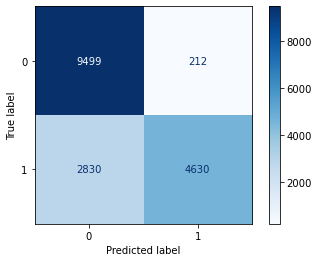

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Y_DoS_pred=clf_DoS.predict(X_DoS_test)

confusion_matrix(Y_DoS_test,Y_DoS_pred)

plot_confusion_matrix(clf_DoS, X_DoS_test, Y_DoS_test, cmap=plt.cm.Blues)
plt.show()


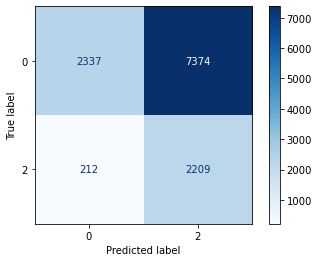

In [50]:
Y_Probe_pred=clf_Probe.predict(X_Probe_test)

confusion_matrix(Y_Probe_test,Y_Probe_pred)

plot_confusion_matrix(clf_Probe, X_Probe_test, Y_Probe_test, cmap=plt.cm.Blues)
plt.show()


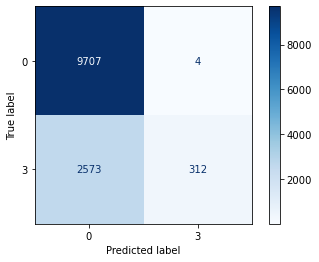

In [51]:
Y_R2L_pred=clf_R2L.predict(X_R2L_test)

confusion_matrix(Y_R2L_test,Y_R2L_pred)

plot_confusion_matrix(clf_R2L, X_R2L_test, Y_R2L_test, cmap=plt.cm.Blues)
plt.show()


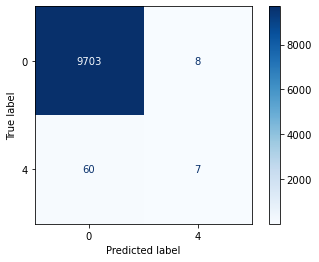

In [52]:
Y_U2R_pred=clf_U2R.predict(X_U2R_test)

confusion_matrix(Y_U2R_test,Y_U2R_pred)

plot_confusion_matrix(clf_U2R, X_U2R_test, Y_U2R_test, cmap=plt.cm.Blues)
plt.show()


In [53]:
# Get the 13 most important features for each attack type
X_DoS_test2 = X_DoS_test[:, rfecolindex_DoS]
X_Probe_test2 = X_Probe_test[:, rfecolindex_Probe]
X_R2L_test2 = X_R2L_test[:, rfecolindex_R2L]
X_U2R_test2 = X_U2R_test[:, rfecolindex_U2R]

# Print the shape of the reduced test sets
print("DoS Shape: ",X_DoS_test2.shape)
print("Probe Shape: ",X_Probe_test2.shape)
print("R2L Shape: ",X_R2L_test2.shape)
print("U2R Shape: ",X_U2R_test2.shape)

DoS Shape:  (17171, 10)
Probe Shape:  (12132, 10)
R2L Shape:  (12596, 10)
U2R Shape:  (9778, 10)


In [54]:
# Compute the accuracy of the classifier using 10-fold cross-validation
accuracy = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='accuracy')

# Print the mean and standard deviation of the accuracy scores
print("DoS Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Compute the precision of the classifier using 10-fold cross-validation
precision = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='precision')

# Print the mean and standard deviation of the precision scores
print("DoS Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Compute the recall of the classifier using 10-fold cross-validation
recall = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='recall')

# Print the mean and standard deviation of the recall scores
print("DoS Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Compute the F1 measure of the classifier using 10-fold cross-validation
f = cross_val_score(clf_DoS, X_DoS_test, Y_DoS_test, cv=10, scoring='f1')

# Print the mean and standard deviation of the F1 scores
print("DoS F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

DoS Accuracy: 0.99639 (+/- 0.00341)
DoS Precision: 0.99505 (+/- 0.00477)
DoS Recall: 0.99665 (+/- 0.00483)
DoS F-measure: 0.99585 (+/- 0.00392)


In [55]:
# Compute the accuracy of the classifier using 10-fold cross-validation and print
accuracy = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='accuracy')
print("Probe Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Compute the precision of the classifier using 10-fold cross-validation and print
precision = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='precision_macro')
print("Probe Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Compute the recall of the classifier using 10-fold cross-validation and print
recall = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='recall_macro')
print("Probe Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Compute the F1 measure of the classifier using 10-fold cross-validation and print
f = cross_val_score(clf_Probe, X_Probe_test, Y_Probe_test, cv=10, scoring='f1_macro')
print("Probe F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

Probe Accuracy: 0.99571 (+/- 0.00328)
Probe Precision: 0.99392 (+/- 0.00684)
Probe Recall: 0.99267 (+/- 0.00405)
Probe F-measure: 0.99329 (+/- 0.00512)


In [56]:
# Compute the accuracy of the classifier using 10-fold cross-validation and print
accuracy = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='accuracy')
print("R2L Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Compute the precision of the classifier using 10-fold cross-validation and print
precision = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='precision_macro')
print("R2L Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Compute the recall of the classifier using 10-fold cross-validation and print
recall = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='recall_macro')
print("R2L Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Compute the F1 measure of the classifier using 10-fold cross-validation and print
f = cross_val_score(clf_R2L, X_R2L_test, Y_R2L_test, cv=10, scoring='f1_macro')
print("R2L F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

R2L Accuracy: 0.97920 (+/- 0.01053)
R2L Precision: 0.97151 (+/- 0.01736)
R2L Recall: 0.96958 (+/- 0.01379)
R2L F-measure: 0.97051 (+/- 0.01478)


In [57]:
# Compute the accuracy of the classifier using 10-fold cross-validation and print
accuracy = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='accuracy')
print("U2R Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

# Compute the precision of the classifier using 10-fold cross-validation and print
precision = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='precision_macro')
print("U2R Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))

# Compute the recall of the classifier using 10-fold cross-validation and print
recall = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='recall_macro')
print("U2R Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))

# Compute the F1 measure of the classifier using 10-fold cross-validation and print
f = cross_val_score(clf_U2R, X_U2R_test, Y_U2R_test, cv=10, scoring='f1_macro')
print("U2R F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))

U2R Accuracy: 0.99652 (+/- 0.00228)
U2R Precision: 0.86295 (+/- 0.08961)
U2R Recall: 0.90958 (+/- 0.09211)
U2R F-measure: 0.88210 (+/- 0.06559)


In [58]:
import shap
from sklearn import ensemble

regressor = ensemble.RandomForestRegressor()
regressor.fit (X_DoS, Y_DoS)

RandomForestRegressor()

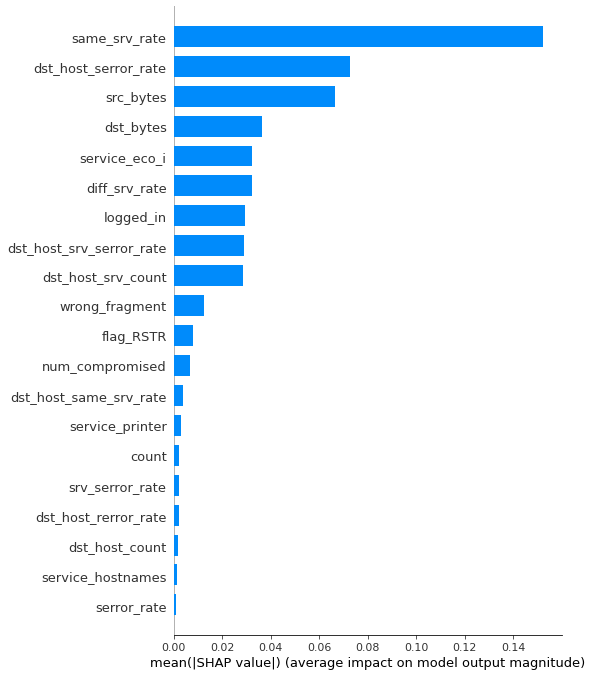

In [59]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(regressor)

# Calculate Shap values
shap_values = explainer.shap_values(X_DoS)

shap.summary_plot(shap_values, X_DoS, feature_names=DoS_df_train.columns, plot_type="bar")

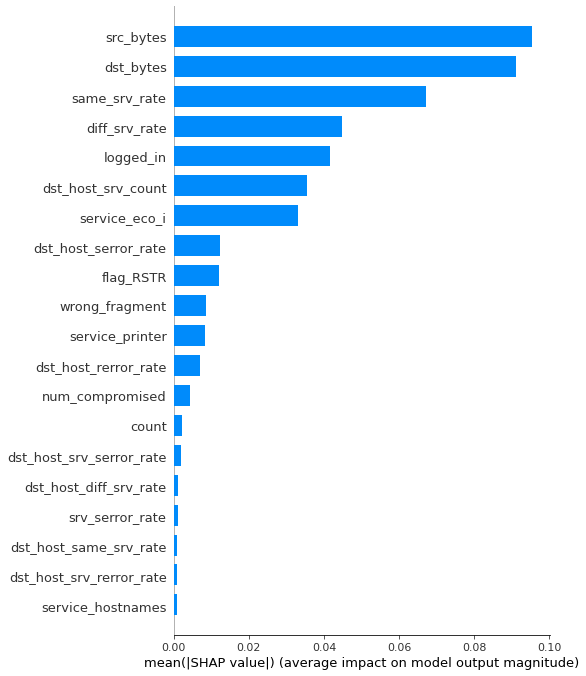

In [60]:
regressor = ensemble.RandomForestRegressor()
regressor.fit (X_Probe, Y_Probe)

# Create object that can calculate shap values
explainer2 = shap.TreeExplainer(regressor)

# Calculate Shap values
shap_values2 = explainer.shap_values(X_Probe)

shap.summary_plot(shap_values2, X_Probe, feature_names=Probe_df_train.columns, plot_type="bar")

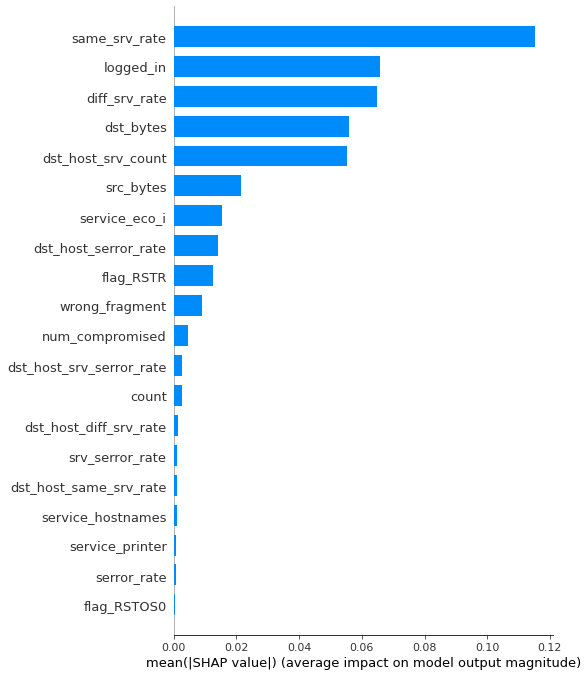

In [61]:
regressor = ensemble.RandomForestRegressor()
regressor.fit (X_R2L, Y_R2L)

# Create object that can calculate shap values
explainer3 = shap.TreeExplainer(regressor)

# Calculate Shap values
shap_values3 = explainer.shap_values(X_R2L)

shap.summary_plot(shap_values3, X_R2L, feature_names=R2L_df_train.columns, plot_type="bar")



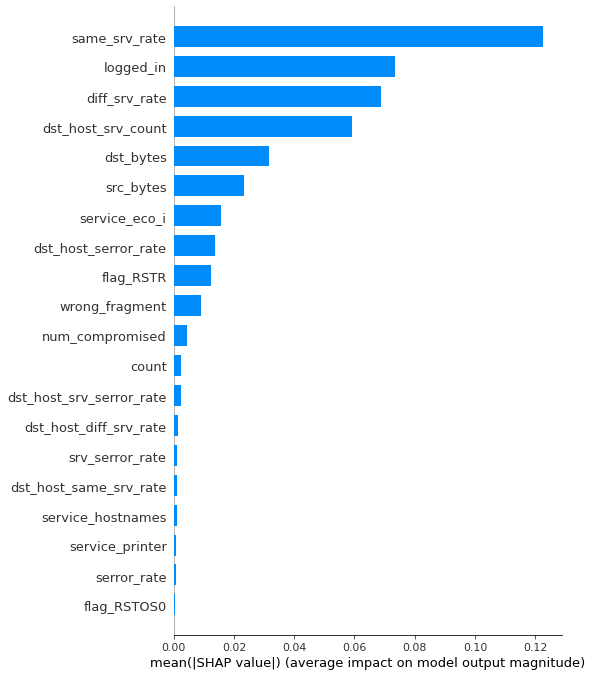

In [62]:
regressor = ensemble.RandomForestRegressor()
regressor.fit (X_U2R, Y_U2R)

# variable for Shap values
explainer4 = shap.TreeExplainer(regressor)

# Calculate Shap values
shap_values4 = explainer.shap_values(X_U2R)

#shap.summary_plot(shap_values4, X_U2R, feature_names=U2R_df_train.columns, plot_type="violin")
shap.summary_plot(shap_values4, X_U2R, feature_names=U2R_df_train.columns, plot_type="bar")

In [63]:
print("X_DoS:", X_DoS.shape)#does not include label column 
print("Dos train:", DoS_df_train.shape)
print("DoS test:", DoS_df_test.shape)
print("Probe train:", Probe_df_train.shape)

X_DoS: (113270, 122)
Dos train: (113270, 123)
DoS test: (17171, 123)
Probe train: (78999, 123)


In [89]:
shap.initjs()
i = 280
shap_values_local = explainer.shap_values(DoS_df_test)
shap.force_plot(explainer.expected_value, shap_values_local[i], features=DoS_df_train.loc[i], feature_names=DoS_df_train.columns)
